<a href="https://colab.research.google.com/github/mobarakol/AI_Medical_Imaging/blob/main/PCA_t_SNE_UMAP_Brain_Tumor_Practical_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brain Tumor Dataset
source: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset<br>
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']<br>
number of training MRIs slices = 5712 <br>
number of testing MRIs slices = 1311 <br>

Download the dataset:

In [ ]:
import gdown

url = 'https://drive.google.com/uc?id=1Oms9X0Vpid_kN8jiSgz-3MhRA5BcmivE'
gdown.download(url,'braintumor.zip',quiet=True)
!unzip -q braintumor.zip -d braintumor

Visualize some samples:

train sample size: 5712 test sample size: 1311
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
(5712, 784)


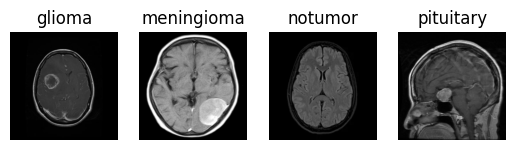

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision import datasets

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])
my_transform = transforms.Compose([
        transforms.Resize((28,28)),
        transforms.ToTensor(),
        normalize,
    ])

train_dataset = datasets.ImageFolder(root='/content/braintumor/Training', transform=my_transform)
test_dataset = datasets.ImageFolder(root='/content/braintumor/Testing', transform=my_transform)

print('train sample size:', len(train_dataset), 'test sample size:', len(test_dataset))
print(train_dataset.class_to_idx)

img_all = []
label_all = []
for data, lab in train_dataset:
    img_all.append(np.array(data)[0,:,:])
    label_all.append(lab)

img_all = np.array(img_all).reshape(len(train_dataset),28*28)
label_all = np.array(label_all)
print(img_all.shape)


class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']
newsize = (224, 224)
img_glioma = Image.open('braintumor/Testing/glioma/Te-gl_0014.jpg').resize(newsize)
img_meningioma = Image.open('braintumor/Testing/meningioma/Te-me_0017.jpg').resize(newsize)
img_healthy = Image.open('braintumor/Testing/notumor/Te-noTr_0002.jpg').resize(newsize)
img_pituitary = Image.open('braintumor/Testing/pituitary/Te-piTr_0008.jpg').resize(newsize)
plt.subplot(1,4,1), plt.axis('OFF'), plt.title(class_names[0]), plt.imshow(img_glioma)
plt.subplot(1,4,2), plt.axis('OFF'),plt.title(class_names[1]), plt.imshow(img_meningioma)
plt.subplot(1,4,3), plt.axis('OFF'),plt.title(class_names[2]), plt.imshow(img_healthy)
plt.subplot(1,4,4), plt.axis('OFF'),plt.title(class_names[3]), plt.imshow(img_pituitary);

PCA

total dimension after PCA reduction: (5712, 2)


<Figure size 640x480 with 0 Axes>

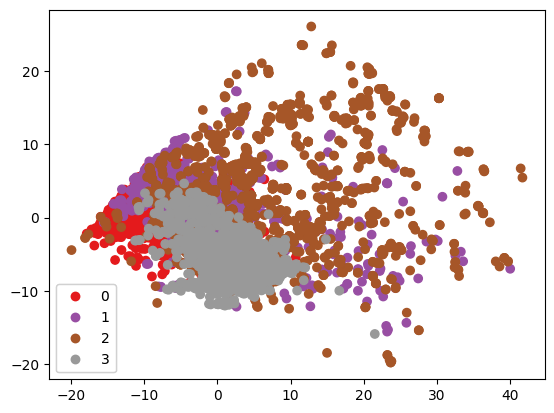

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(2) # we need 2 principal components.
img_all = np.array(img_all).reshape(len(train_dataset),28*28)
converted_data = pca.fit_transform(img_all)

print('total dimension after PCA reduction:', converted_data.shape)

# plt.set_cmap('tab10')
fig, ax = plt.subplots()
scatter = ax.scatter(converted_data[:, 0], converted_data[:, 1], c=label_all, cmap='Set1')
legend = ax.legend(*scatter.legend_elements(),loc="lower left")
ax.add_artist(legend)
plt.show()
plt.close()

#PCA from Scratch

<h2>Principal Component Analysis (PCA) - 5 Key Steps</h2>

<ol>
  <li>
    <h3>Step 1: Mean-Center the Data</h3>
    <p>Compute the mean of each feature and subtract it from the dataset.</p>
    <p>
      <em>X̄ = X − 1μᵀ</em><br>
      Where:
      <ul>
        <li><em>X</em> is the original data matrix (<em>n × d</em>).</li>
        <li><em>μ</em> is the mean vector (<em>d × 1</em>).</li>
        <li><em>1</em> is an <em>n × 1</em> column of ones.</li>
      </ul>
    </p>
  </li>

  <li>
    <h3>Step 2: Compute the Covariance Matrix</h3>
    <p>Calculate the covariance matrix to measure feature relationships.</p>
    <p>
      <em>S = (1 / (n − 1)) · X̄ᵀX̄</em><br>
      <strong>Dimensions:</strong> S is a <em>d × d</em> covariance matrix.
    </p>
  </li>

  <li>
    <h3>Step 3: Perform Eigen-Decomposition</h3>
    <p>Find the eigenvalues and eigenvectors of the covariance matrix.</p>
    <p>
      <em>Sv<sub>i</sub> = λ<sub>i</sub>v<sub>i</sub></em><br>
      <strong>Eigen-decomposition:</strong>
      <ul>
        <li><em>V</em> contains eigenvectors (principal components).</li>
        <li><em>Λ</em> is a diagonal matrix with eigenvalues.</li>
      </ul>
      <em>S = VΛVᵀ</em>
    </p>
  </li>

  <li>
    <h3>Step 4: Select Top k Principal Components</h3>
    <p>Pick the eigenvectors corresponding to the k largest eigenvalues.</p>
    <p>
      <em>V<sub>k</sub> = [v<sub>1</sub>, v<sub>2</sub>, …, v<sub>k</sub>]</em><br>
      This matrix (<em>d × k</em>) reduces the dimensionality while retaining the most variance.
    </p>
  </li>

  <li>
    <h3>Step 5: Transform the Data (Projection)</h3>
    <p>Project the original data onto the new lower-dimensional subspace.</p>
    <p>
      <em>Z = X̄V<sub>k</sub></em><br>
      <strong>Output:</strong> <em>Z</em> is the reduced-dimensional representation of <em>X</em> with shape (<em>n × k</em>).
    </p>
  </li>
</ol>


Total dimension after PCA reduction: (5712, 2)


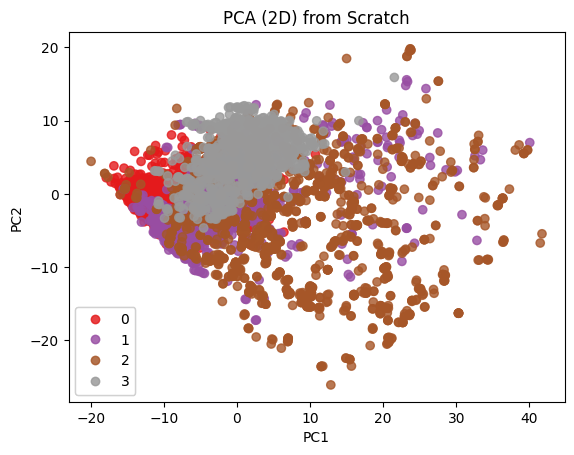

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------
# 1) Example: Flatten images and get labels
# -------------------------------------------------------
# Suppose 'train_dataset' is a dataset of images 28x28, and 'img_all' is a list/array of these images.
# Also assume 'label_all' is a list/array of labels corresponding to each image.

# For demonstration, let's assume 'img_all' is already defined.
# Example shape: (num_samples, 28, 28)

num_samples = len(train_dataset)


# -------------------------------------------------------
# 2) Manual PCA function
# -------------------------------------------------------
def pca_from_scratch(X, n_components=2):
    """
    Perform PCA on data X (shape: num_samples x num_features),
    returning the projected data with shape: (num_samples, n_components).
    """
    # 1) Center the data (subtract mean of each feature).
    mean_vec = np.mean(X, axis=0)              # shape (num_features,)
    X_centered = X - mean_vec                  # shape (num_samples, num_features)

    # 2) Compute covariance matrix of shape (num_features, num_features).
    #    For numerical stability on large data, you might prefer to do SVD on X_centered directly.
    #    But here we'll show the straightforward approach:
    num_samples = X_centered.shape[0]
    Cov = (X_centered.T @ X_centered) / (num_samples - 1)  # shape (num_features, num_features)

    # 3) Eigen-decomposition
    eigvals, eigvecs = np.linalg.eig(Cov)  # eigvals shape (num_features,), eigvecs shape (num_features, num_features)

    # 4) Sort eigenvalues (and corresponding eigenvectors) descending by magnitude
    sort_indices = np.argsort(eigvals)[::-1]
    eigvals_sorted = eigvals[sort_indices]
    eigvecs_sorted = eigvecs[:, sort_indices]

    # 5) Select the top n_components
    top_vectors = eigvecs_sorted[:, :n_components]  # shape (num_features, n_components)

    # 6) Project data onto top eigenvectors
    #    (num_samples, num_features) x (num_features, n_components) => (num_samples, n_components)
    X_pca = X_centered @ top_vectors

    return X_pca

# -------------------------------------------------------
# 3) Run PCA on the flattened images
# -------------------------------------------------------
converted_data = pca_from_scratch(img_all, n_components=2)

print("Total dimension after PCA reduction:", converted_data.shape)  # should be (num_samples, 2)

# -------------------------------------------------------
# 4) Plot the results
# -------------------------------------------------------
# 'converted_data[:,0]' is PC1, 'converted_data[:,1]' is PC2.
fig, ax = plt.subplots()
scatter = ax.scatter(converted_data[:, 0], converted_data[:, 1],
                     c=label_all, cmap='Set1', alpha=0.8)
legend = ax.legend(*scatter.legend_elements(), loc="lower left")
ax.add_artist(legend)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("PCA (2D) from Scratch")
plt.show()
plt.close()


T-SNE

total dimension after t-SNE reduction: (5712, 2)


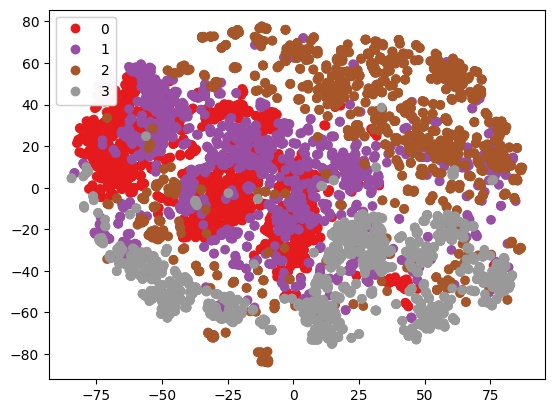

In [ ]:
from sklearn.manifold import TSNE

X_embedded = TSNE().fit_transform(img_all)

print('total dimension after t-SNE reduction:', X_embedded.shape)


fig, ax = plt.subplots()
scatter = ax.scatter(X_embedded[:,0], X_embedded[:,1], c=label_all, cmap='Set1')

legend = ax.legend(*scatter.legend_elements(),loc="upper left")
ax.add_artist(legend)

plt.show()
plt.close()

tSNE from Scratch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

# -------------------------------
# 1) Compute Pairwise Similarities (High-Dimensional)
# -------------------------------
def pairwise_affinities(X, perplexity=30.0, tol=1e-5):
    """
    Compute P_ij, the pairwise similarity matrix using Gaussian kernels.
    Uses binary search to find the optimal sigma for each point.
    """
    n = X.shape[0]
    P = np.zeros((n, n))

    # Compute squared Euclidean distances
    distances = squareform(pdist(X, 'sqeuclidean'))

    # Binary search for each row to get correct sigma
    for i in range(n):
        sigma = binary_search_sigma(distances[i], perplexity, tol)
        P[i] = np.exp(-distances[i] / (2 * sigma ** 2))
        P[i, i] = 0  # Remove self-similarity

    # Normalize P
    P = P + P.T  # Symmetrize
    P /= np.sum(P)

    return P

def binary_search_sigma(distances, perplexity, tol=1e-5):
    """Binary search for sigma to achieve the desired perplexity."""
    lower, upper = 1e-10, 1000  # Sigma search range
    target_entropy = np.log(perplexity)

    for _ in range(50):  # Max iterations
        sigma = (lower + upper) / 2
        P_i = np.exp(-distances / (2 * sigma ** 2))
        P_i[distances == 0] = 0  # Avoid self-affinity
        P_i /= np.sum(P_i)  # Normalize

        entropy = -np.sum(P_i * np.log2(P_i + 1e-10))  # Shannon entropy

        if np.abs(entropy - target_entropy) < tol:
            break
        elif entropy > target_entropy:
            upper = sigma
        else:
            lower = sigma

    return sigma

# -------------------------------
# 2) Compute Low-Dimensional Similarities (t-Distribution)
# -------------------------------
def low_dim_affinities(Y):
    """Compute Q_ij using Student’s t-distribution (df=1)."""
    n = Y.shape[0]
    distances = squareform(pdist(Y, 'sqeuclidean'))
    Q = 1 / (1 + distances)
    np.fill_diagonal(Q, 0)  # Remove self-similarity
    Q /= np.sum(Q)
    return Q

# -------------------------------
# 3) Compute Gradients for KL Divergence
# -------------------------------
def compute_gradients(P, Q, Y):
    """Compute gradient of KL divergence w.r.t. Y."""
    pq_diff = P - Q
    distances = squareform(pdist(Y, 'sqeuclidean')) + 1
    grad = np.zeros_like(Y)

    for i in range(Y.shape[0]):
        dY = (pq_diff[:, i][:, np.newaxis] * (Y[i] - Y)).T / distances[i]
        grad[i] = 4 * np.sum(dY, axis=1)  # Scale by 4 (from original t-SNE paper)

    return grad

# -------------------------------
# 4) t-SNE Optimization with Gradient Descent
# -------------------------------
def tsne(X, n_components=2, perplexity=30, lr=200, n_iter=1000):
    """Performs t-SNE from scratch."""
    np.random.seed(42)

    # Step 1: Compute high-dimensional similarities
    P = pairwise_affinities(X, perplexity)
    P = np.maximum(P, 1e-12)  # Avoid log(0) issues

    # Step 2: Initialize low-dimensional embedding randomly
    Y = np.random.randn(X.shape[0], n_components) * 0.01

    # Step 3: Gradient Descent Optimization
    momentum = 0.9
    velocity = np.zeros_like(Y)

    for t in range(n_iter):
        # Compute low-dimensional affinities
        Q = low_dim_affinities(Y)
        Q = np.maximum(Q, 1e-12)  # Avoid log(0) issues

        # Compute gradient
        grad = compute_gradients(P, Q, Y)

        # Update embedding with momentum
        velocity = momentum * velocity - lr * grad
        Y += velocity

        # Print progress
        if t % 100 == 0:
            kl_divergence = np.sum(P * np.log(P / Q))
            print(f"Iteration {t}, KL Divergence: {kl_divergence:.4f}")

    return Y

# -------------------------------
# 5) Load Data and Run t-SNE
# -------------------------------
# Assuming img_all is a list of images (e.g., from a dataset)
num_samples = len(img_all)

# Run t-SNE on the dataset
X_embedded = tsne(img_all, n_components=2, perplexity=30, n_iter=500)

print("Total dimension after t-SNE reduction:", X_embedded.shape)

# -------------------------------
# 6) Plot Results
# -------------------------------
fig, ax = plt.subplots()
scatter = ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=label_all, cmap='Set1')
legend = ax.legend(*scatter.legend_elements(), loc="upper left")
ax.add_artist(legend)
plt.title("t-SNE Visualization from Scratch")
plt.show()
plt.close()


Iteration 0, KL Divergence: 7.1099


UMAP

In [ ]:
!pip -q install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.1 MB/s eta 0:00:00


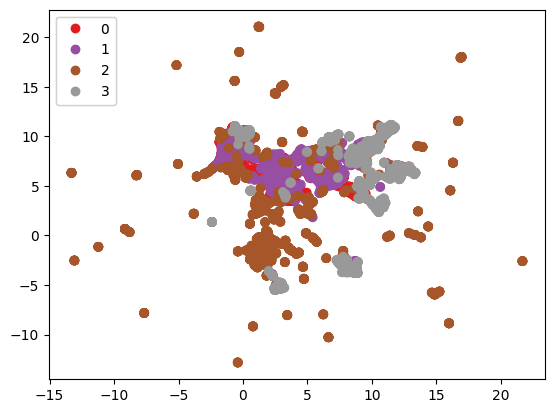

In [ ]:
from umap import UMAP


X_UMAP = UMAP(n_neighbors=15,
                      min_dist=0.1,
                      metric='correlation').fit_transform(img_all)

fig, ax = plt.subplots()
scatter = ax.scatter(X_UMAP[:,0], X_UMAP[:,1], c=label_all, cmap='Set1')
legend = ax.legend(*scatter.legend_elements(),loc="upper left")
ax.add_artist(legend)
plt.show()
plt.close()